<a href="https://www.kaggle.com/code/akachimaduako/sales-prediction?scriptVersionId=103101151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# By Maduako Akachi

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load and read the dataset into panda dataframe
#Read statistics
basket_df = pd.read_csv('../input/ecommerce-sales-dataset/basket_details.csv')
custom_df = pd.read_csv('../input/ecommerce-sales-dataset/customer_details.csv')
display(basket_df.head())
display(custom_df.head())

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [3]:
#Get more information about the dataset
display(basket_df.info())
display(custom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


None

In [4]:
#Check for missing values
display(basket_df.isnull().sum())
display(custom_df.isnull().sum())

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64

In [5]:
#Check for duplicate values
display(sum(basket_df.duplicated()))
display(sum(custom_df.duplicated()))

0

0

In [6]:
#make customer_age a whole number
custom_df['customer_age'] = custom_df['customer_age'].astype(int)

In [7]:
sns.set()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='basket_count'>

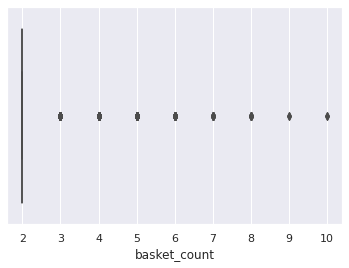

In [8]:
# Box Plot for basket_count
sns.boxplot(basket_df['basket_count'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='customer_age'>

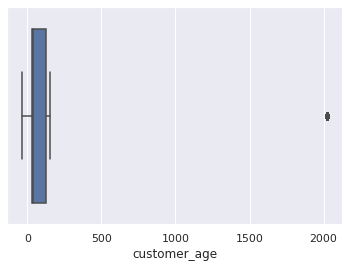

In [9]:
# Box Plot for customer_age
sns.boxplot(custom_df['customer_age'])

In [10]:
# IQR
Q1 = np.percentile(custom_df['customer_age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(custom_df['customer_age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", custom_df.shape)
 
# Upper bound
upper = np.where(custom_df['customer_age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(custom_df['customer_age'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
custom_df.drop(upper[0], inplace = True)
custom_df.drop(lower[0], inplace = True)
 
print("New Shape: ", custom_df.shape)

Old Shape:  (20000, 4)
New Shape:  (17898, 4)


In [11]:
sns.set()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


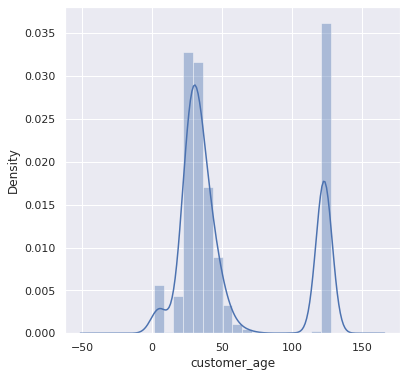

In [12]:
#basket_count distribution
plt.figure(figsize=(6,6))
sns.distplot(custom_df['customer_age'])
plt.show()

In [13]:
custom_df['sex'].value_counts()

Male                13627
Female               4262
kvkktalepsilindi        8
UNKNOWN                 1
Name: sex, dtype: int64

In [14]:
custom_df['sex'].replace('kvkktalepsilindi', np.nan, inplace=True)

In [15]:
custom_df['sex'].replace('UNKNOWN', np.nan, inplace=True)

In [16]:
custom_df.dropna(inplace=True)

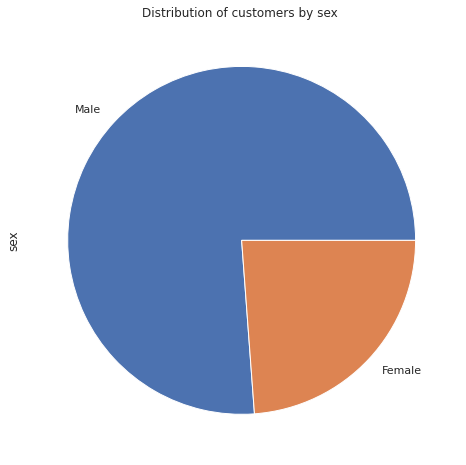

In [17]:
custom_df['sex'].value_counts().plot(kind='pie', title='Distribution of customers by sex ', figsize= (8,8));

Text(0.5, 1.0, 'distribution of sex of customers')

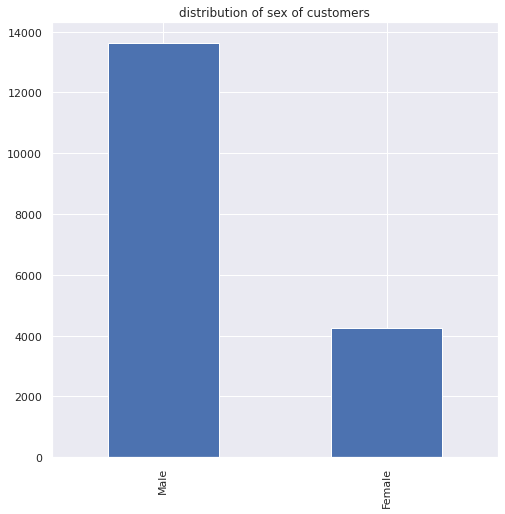

In [18]:
custom_df['sex'].value_counts().plot(kind='bar', figsize= (8,8));
plt.title('distribution of sex of customers')

In [19]:
#merge dataframes
merged_df = pd.merge(basket_df, custom_df, on='customer_id', how='inner')

In [20]:
merged_df.head()

,customer_id,product_id,basket_date,basket_count,sex,customer_age,tenure
0,4897641,34525548,2019-06-15,2,Male,40,114
1,11623549,50394038,2019-06-18,2,Male,30,63
2,11665521,41476812,2019-06-15,2,Female,51,62
3,4193819,6455162,2019-06-15,2,Male,42,117
4,1030589,38578121,2019-05-26,2,Male,45,127


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   71 non-null     int64 
 1   product_id    71 non-null     int64 
 2   basket_date   71 non-null     object
 3   basket_count  71 non-null     int64 
 4   sex           71 non-null     object
 5   customer_age  71 non-null     int64 
 6   tenure        71 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.4+ KB


try bigmart prediction